# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic_s20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

0    1   2    3    4   5   6    7   8   9    10   11   12   13  14  15  \
0   508   95  46   92  159  63  11  160  42  20  157  176  372  171  70   7   
1   252   84  44   80  140  58  11  156  44  20  157  166  349  176  74   5   
2   755   86  39   58  125  55   5  117  57  17  134  140  204  148  69   7   
3   744   96  46   88  174  68  10  155  43  19  148  173  354  182  69  14   
4   448  101  53   91  194  65   6  204  32  23  161  231  636  214  78   5   
5   652   97  37   78  181  62   8  161  41  20  131  182  389  117  62   2   
6   492   85  43   66  130  57   6  151  45  19  143  173  333  168  86   4   
7   577   99  54  100  199  62   9  200  33  23  166  222  600  241  70   2   
8    34   87  38   85  177  61   8  164  40  20  129  186  402  130  63   1   
9   697   92  37   75  184  70   6  154  42  19  131  184  363  127  71   0   
10  842   89  46   84  163  66  11  159  43  20  159  173  368  176  72   1   
11  180  102  54  106  221  68  11  207  32  24  164  228  638  238  71   0   
12  407   91  38   75  136  53   6  144  47  19  131  165  305  149  69   1   
13  344   99  55  101  219  68  10  224  30  25  178  228  737  213  74  11   
14  566  108  54  103  212  65  11  208  32  24  162  228  648  240  71   9   

    16   17   18  
0   21  189  200  
1   17  183  193  
2    6  190  194  
3   15  194  202  
4   14  192  192  
5   28  203  211  
6    9  180  183  
7    7  189  198  
8   25  198  205  
9    4  198  202  
10  20  186  197  
11  26  189  200  
12   7  186  191  
13  20  187  196  
14   0  189  197

Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

0           1           2           3           4           5   \
count  549.000000  549.000000  549.000000  549.000000  549.000000  549.000000   
mean   428.976321   93.976321   44.852459   82.457195  169.772313   61.923497   
std    245.050057    8.226348    6.138465   16.021099   34.995582    8.833495   
min      0.000000   73.000000   33.000000   40.000000  104.000000   47.000000   
25%    226.000000   88.000000   40.000000   70.000000  141.000000   57.000000   
50%    428.000000   93.000000   44.000000   80.000000  168.000000   62.000000   
75%    642.000000  100.000000   50.000000   98.000000  197.000000   65.000000   
max    844.000000  119.000000   58.000000  110.000000  333.000000  138.000000   

               6           7           8           9           10          11  \
count  549.000000  549.000000  549.000000  549.000000  549.000000  549.000000   
mean     8.925319  168.810565   40.969035   20.586521  148.122040  188.739526   
std      5.440108   33.117472    7.841551    2.577677   14.383234   31.238421   
min      2.000000  112.000000   26.000000   17.000000  118.000000  130.000000   
25%      7.000000  146.000000   33.000000   19.000000  137.000000  167.000000   
50%      8.000000  157.000000   43.000000   20.000000  146.000000  178.000000   
75%     10.000000  199.000000   46.000000   23.000000  160.000000  217.000000   
max     55.000000  257.000000   61.000000   28.000000  182.000000  320.000000   

              12          13          14          15          16          17  \
count  549.00000  549.000000  549.000000  549.000000  549.000000  549.000000   
mean   439.31694  174.204007   72.469945    6.316940   12.653916  188.963570   
std    174.78968   32.559635    8.038542    4.895039    9.011979    6.124212   
min    184.00000  109.000000   60.000000    0.000000    0.000000  176.000000   
25%    318.00000  148.000000   67.000000    2.000000    5.000000  185.000000   
50%    364.00000  174.000000   71.000000    6.000000   11.000000  188.000000   
75%    595.00000  198.000000   75.000000    9.000000   19.000000  193.000000   
max    968.00000  268.000000  135.000000   22.000000   41.000000  206.000000   

               18  
count  549.000000  
mean   195.885246  
std      7.452008  
min    181.000000  
25%    191.000000  
50%    197.000000  
75%    201.000000  
max    211.000000

In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


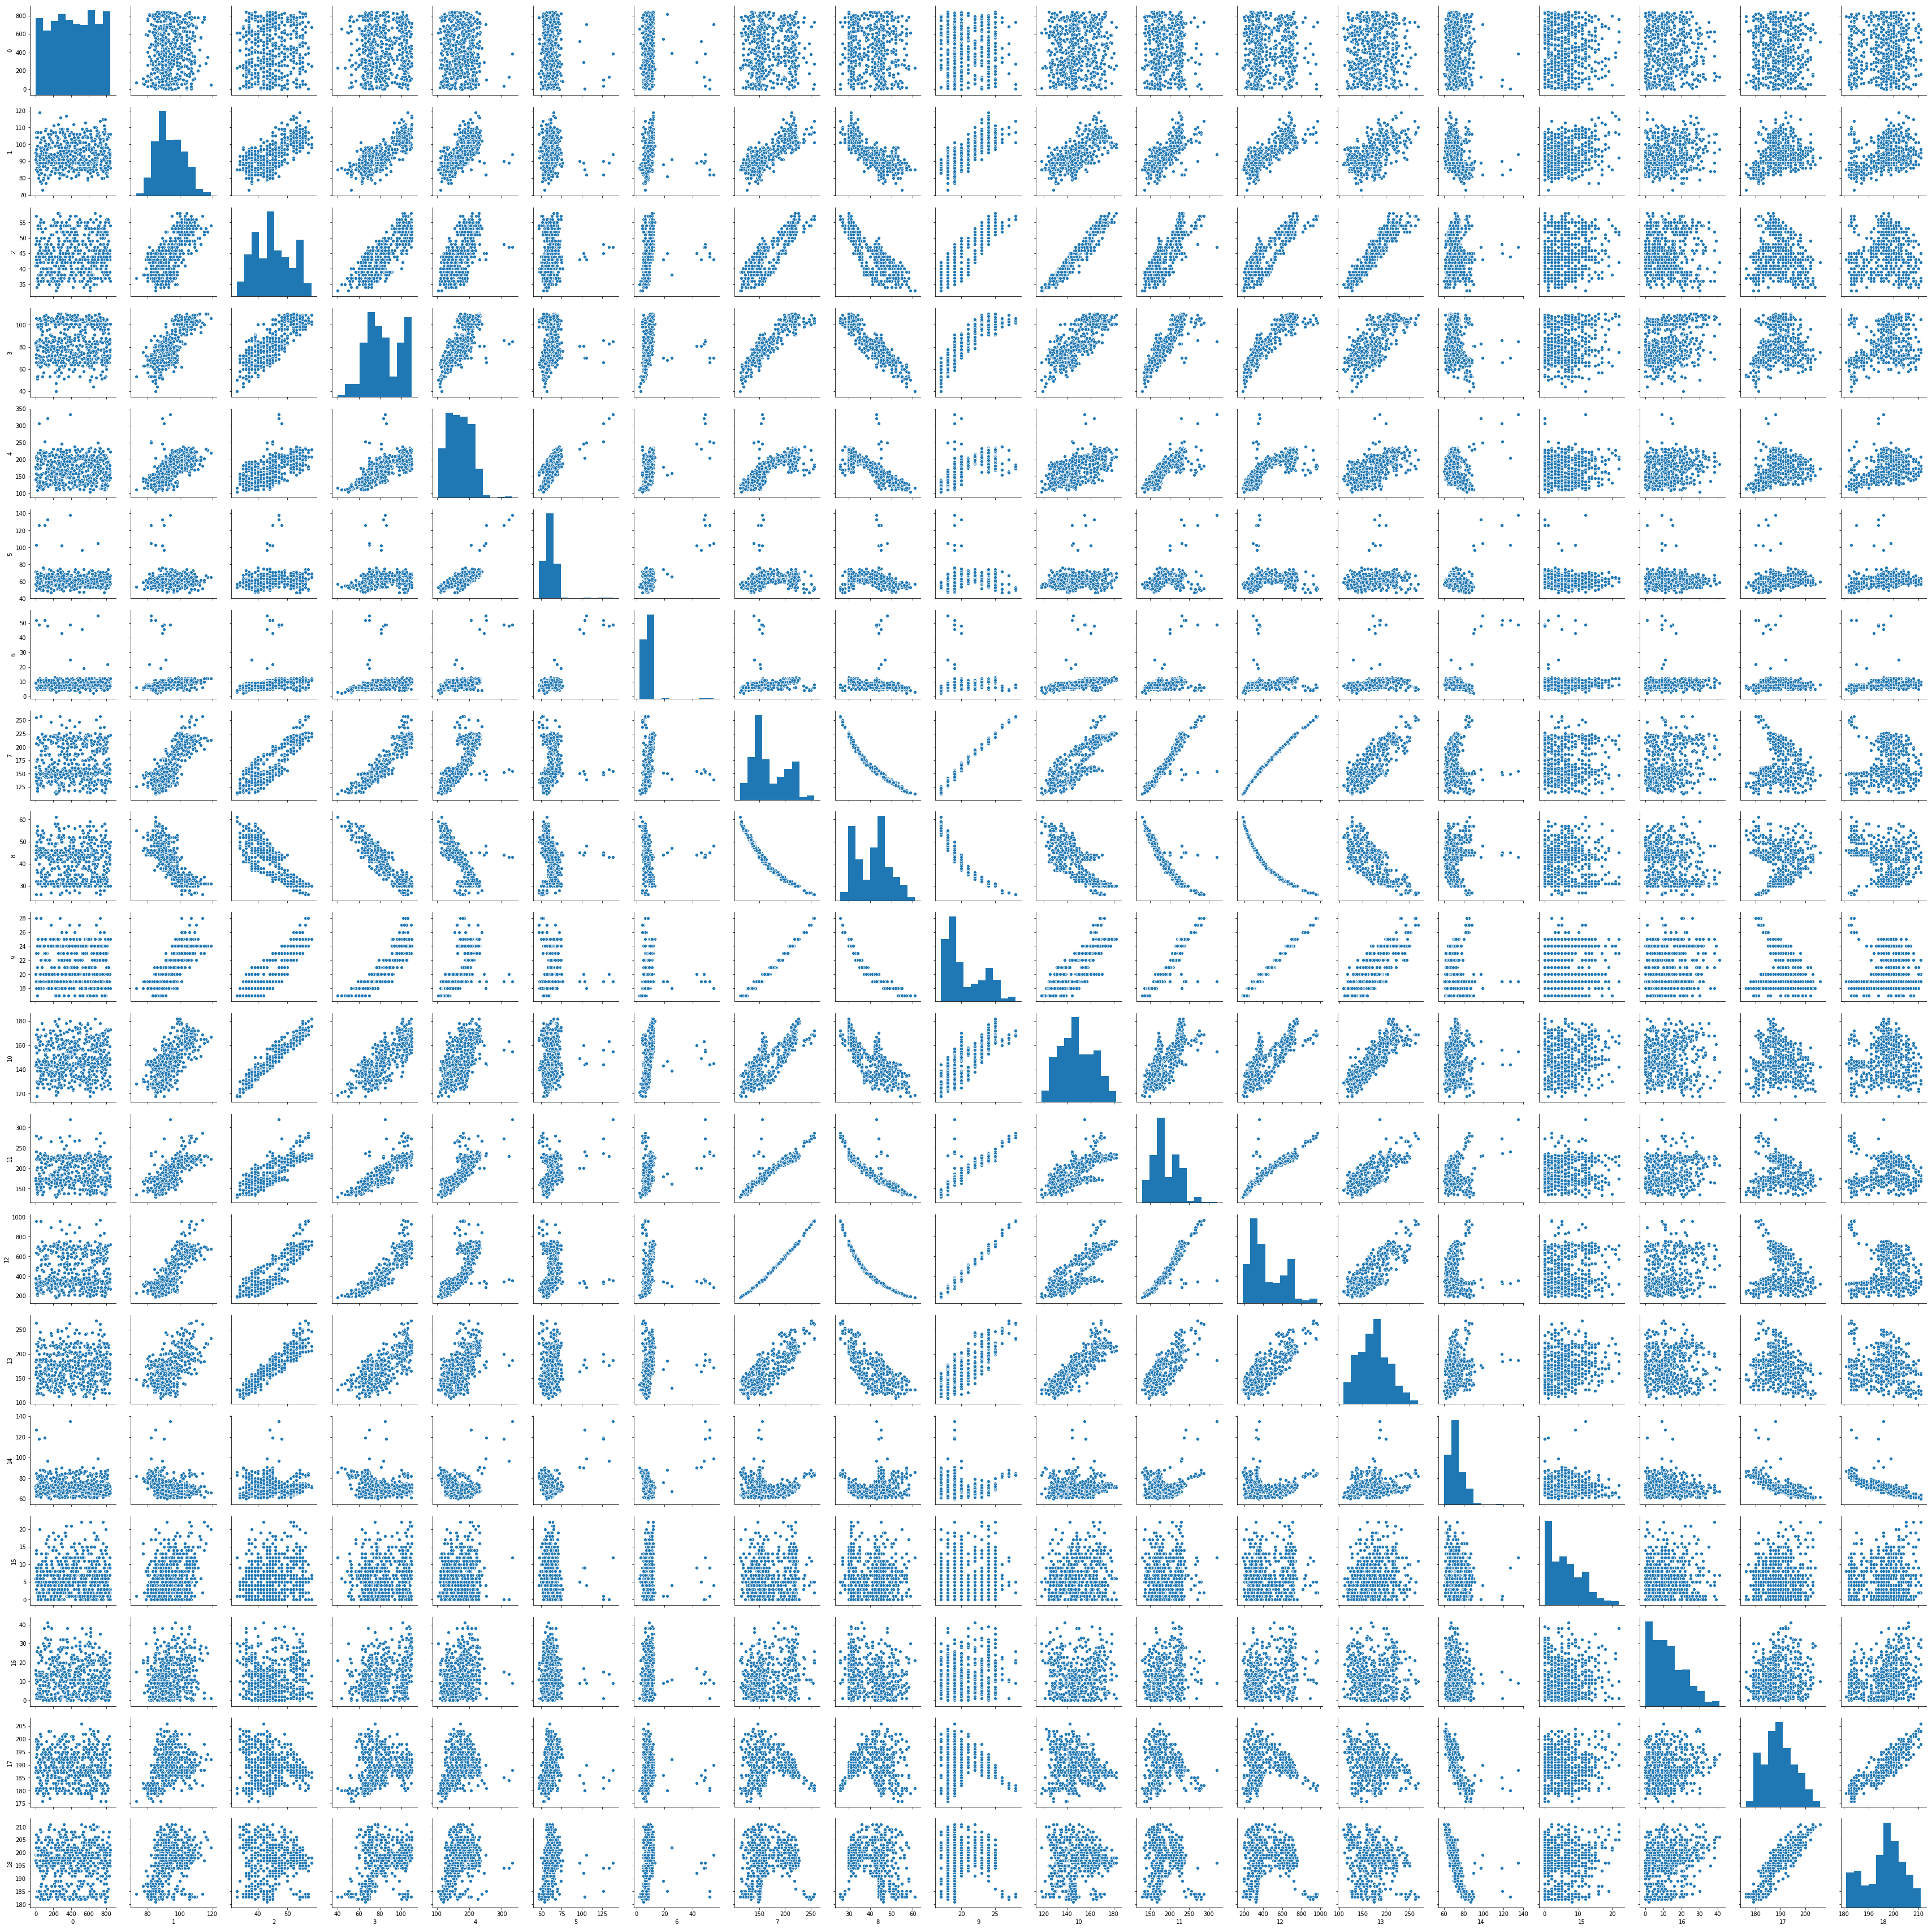

In [6]:
sns.pairplot(X_train_pd)

Графики отображают попарную зависимость признаков. Видно, что многие признаки имеют линейную зависимость или иную корреляцию. Чтобы ускорить модель нужно исключить коррелирующие признаки. 

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
#библиотека для предобработки данных
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [8]:
num_classes = X_train.shape[1]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler - стандартизация распределения параметров, поскольку значения параметров имеют сильный разброс, что видно из описания, нужно стандартизировать распредление. Так же мы делаем стандартизацию для приведения распределния всех параметров к схожему виду (среднее - 0, дисперсия в тех же масштабах). Это проводится для того, чтобы параметры одинакого влияли на обучение.

LabelEncoder - кодирование целевой функции.



#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc

from tqdm import tqdm
import scikitplot as skplt

In [12]:
log_reg = LogisticRegression(multi_class='ovr')
C = np.linspace(0.1, 1, 10).tolist() + np.linspace(1, 20, 30).tolist()
param_grid = {'C': C,
              'max_iter': [50],
              'penalty': ['l2', 'l1']}


grid_clf = GridSearchCV(log_reg, param_grid, scoring='accuracy', n_jobs=1, cv=10)
grid_clf.fit(X_train, y_train)

best_clf = log_reg.set_params(**grid_clf.best_params_)
y_pred = best_clf.fit(X_train, y_train).predict(X_test)

In [50]:
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print('F1_score : {:.3f}\nAccuracy: {:.3f}'.format(f1, accuracy))

F1_score : 0.592
Accuracy: 0.593


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


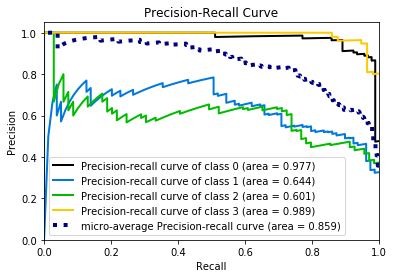

In [26]:
probas = best_clf.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, probas)
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=num_classes)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=19, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Рассмотрим долю исходной дисперсии в данных, которая относится к компонентам PCA

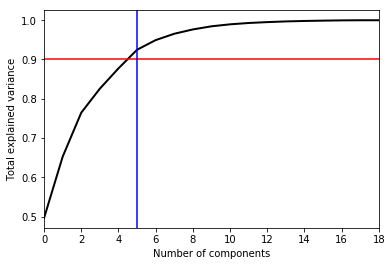

In [29]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlim(0, num_classes - 1)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.axhline(0.9, c='r')
plt.axvline(5, c='b')

Соответственно для модели нужно оставить 5 компонент для покрытия 90% дисперсии исходных данных (обычно этого хватает). Но по графику видно, что для рассматриваемых данных можно оставить лишь 11 компоненты, чтобы получить почти 100% дисперсии.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [35]:
pca = PCA(n_components=11)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

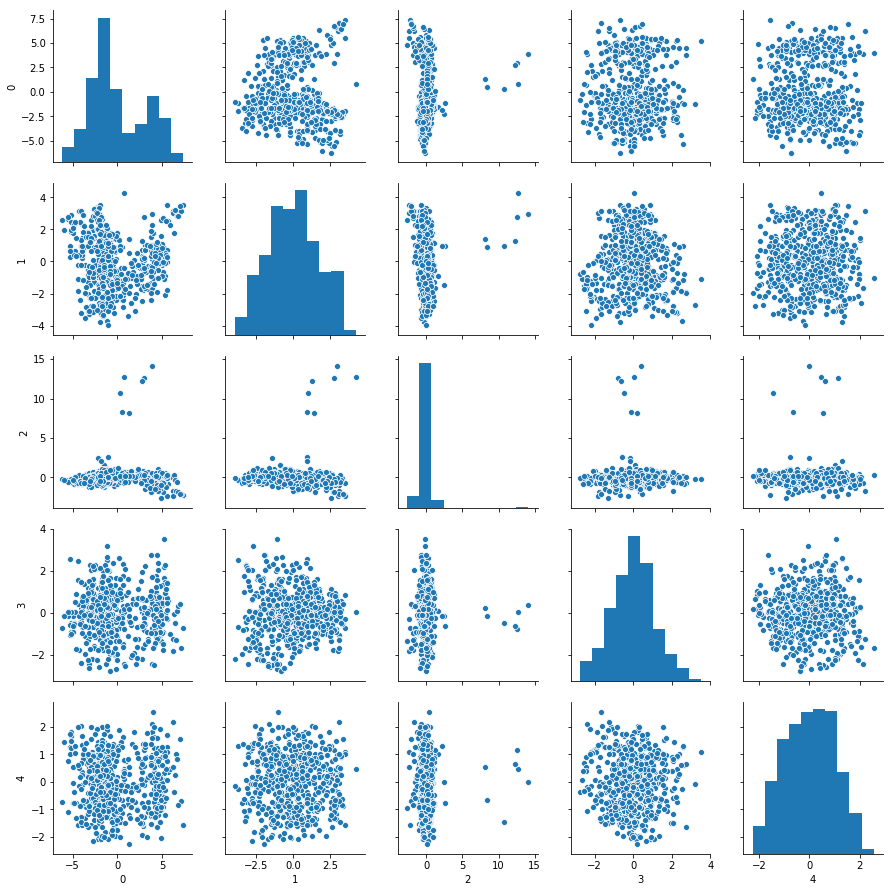

In [28]:
sns.pairplot(pd.DataFrame(X_train_pca))

Сравнивая графики попарной зависимости параметров полученные после применения PCA видим, что PCA убрало корреляцию между параметрами.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [36]:
log_reg = LogisticRegression(multi_class='ovr')
C = np.linspace(0.1, 1, 10).tolist() + np.linspace(1, 20, 30).tolist()
param_grid = {'C': C,
              'max_iter': [10, 50],
              'penalty': ['l2', 'l1']}


grid_clf = GridSearchCV(log_reg, param_grid, scoring='accuracy', n_jobs=1, cv=10)
grid_clf.fit(X_train_pca, y_train)

best_clf = log_reg.set_params(**grid_clf.best_params_)
y_pred = best_clf.fit(X_train_pca, y_train).predict(X_test_pca)

In [37]:
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print('F1_score : {:.3f}\nAccuracy: {:.3f}'.format(f1, accuracy))

F1_score : 0.697
Accuracy: 0.710


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


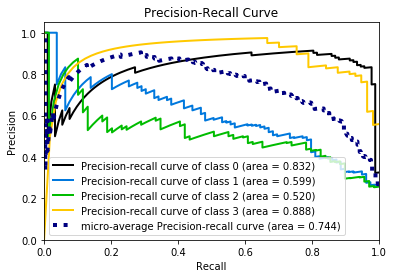

In [39]:
probas = best_clf.predict_proba(X_test_pca)
skplt.metrics.plot_precision_recall_curve(y_test, probas)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [41]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
cv = 10
param_grid = {'max_depth': np.arange(5, 51).tolist(),
              'criterion': ['entropy']}

grid_clf = GridSearchCV(tree, param_grid, scoring='accuracy', n_jobs=1, cv=10)
grid_clf.fit(X_train_pca, y_train)

best_clf = tree.set_params(**grid_clf.best_params_)
y_pred = best_clf.fit(X_train_pca, y_train).predict(X_test_pca)

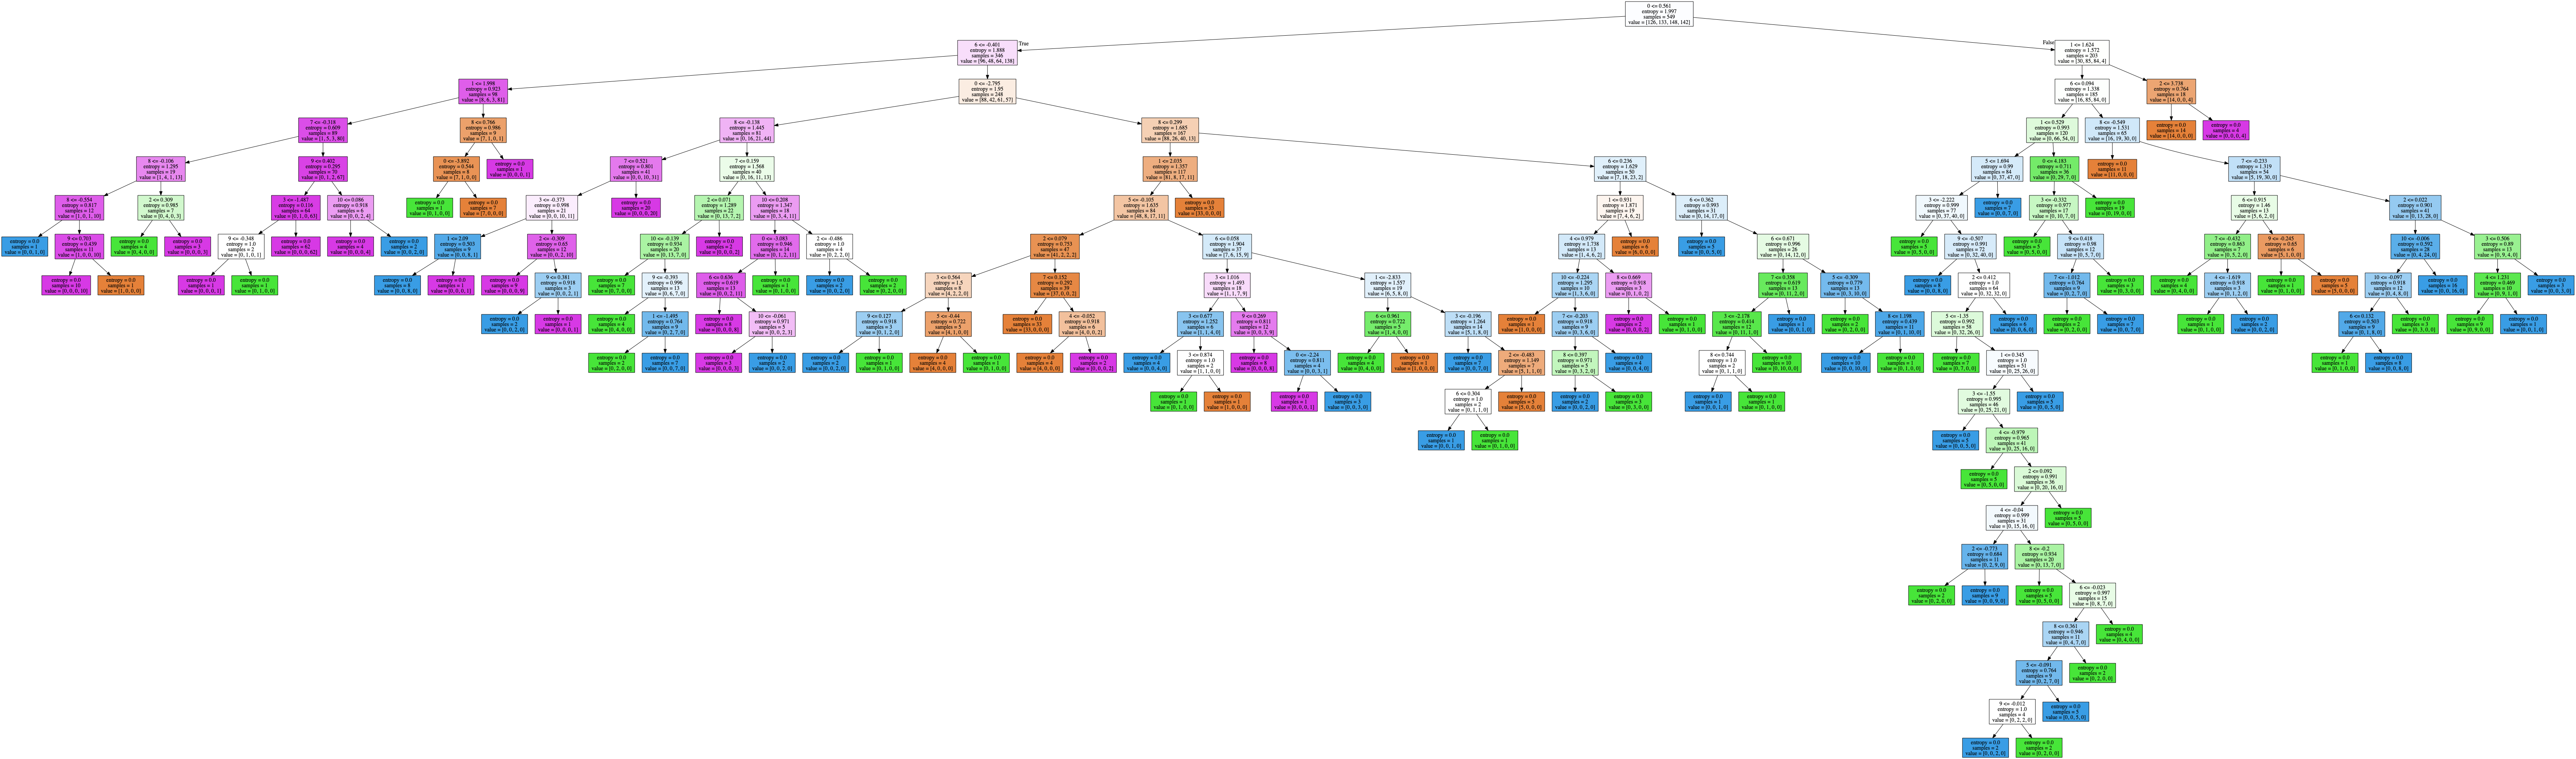

In [43]:
from sklearn.tree import export_graphviz
from IPython.display import Image

export_graphviz(tree, feature_names=range(11), out_file='small_tree.dot', filled=True)
!dot -Tpng 'small_tree.dot' -o 'small_tree.png'
Image(filename='small_tree.png')


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of N algorithms varying N from 2 to 100 (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


To build a __Bagging__ ensebmle you might generate 50 subsets of `train` data (of the same size as the original dataset) using bootstrap procedure. Then you train logistic regression/decision tree with optimal hyperparameters you estimated before on each subset. Finally, you average the models predictions.

*Hint: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [44]:
from sklearn.ensemble import BaggingClassifier

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [45]:
def dependency_n_estimator(clf, n_estimators, n_repetition = 10):
    result = []
    for n_est in tqdm(n_estimators):
        result_i = []
        for i in range(n_repetition):
            clf_inner = clf.set_params(**{'n_estimators': n_est})
            clf_inner.fit(X_train, y_train)
            score = accuracy_score(y_test, clf_inner.predict(X_test))
            result_i.append(score)
        result.append(result_i)
    result = np.array(result)
    mean = result.mean(axis=1)
    std = result.std(axis=1)
    print('N = {}'.format(n_estimators[np.argmax(mean)]))
    f, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(n_estimators, mean, '--')
    ax.fill_between(n_estimators, mean - std, mean + std, alpha=0.3)
    plt.grid()
    plt.show()

100%|██████████| 25/25 [01:05<00:00,  2.62s/it]

N = 30


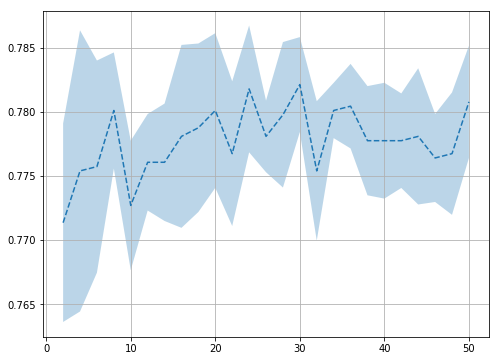

In [47]:
log_reg = LogisticRegression(multi_class='ovr')
best_params = {'C': 3, 'max_iter': 50, 'penalty': 'l2'}
clf = BaggingClassifier(log_reg.set_params(**best_params), bootstrap=True)

dependency_n_estimator(clf, np.arange(2, 51, 2))

100%|██████████| 25/25 [00:51<00:00,  2.07s/it]


N = 36


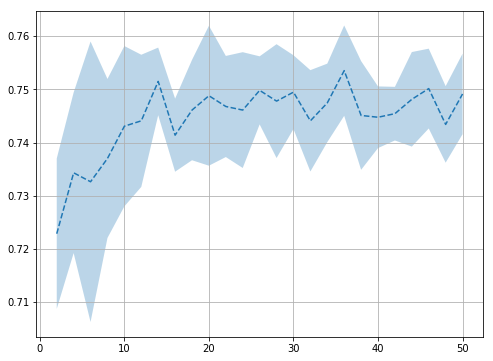

In [53]:
log_reg = LogisticRegression(multi_class='ovr')
best_params = {'C': 3, 'max_iter': 50, 'penalty': 'l2'}
clf = BaggingClassifier(log_reg.set_params(**best_params), bootstrap=True, bootstrap_features=True)

dependency_n_estimator(clf, np.arange(2, 51, 2))

100%|██████████| 25/25 [00:21<00:00,  1.16it/s]


N = 44


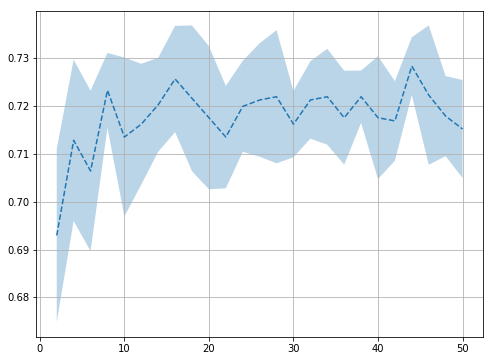

In [55]:
tree = DecisionTreeClassifier()
best_params = {'criterion': 'entropy', 'max_depth': 5}
clf = BaggingClassifier(tree.set_params(**best_params), bootstrap=True)

dependency_n_estimator(clf, np.arange(2, 51, 2))

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

100%|██████████| 25/25 [00:10<00:00,  2.45it/s]

N = 48


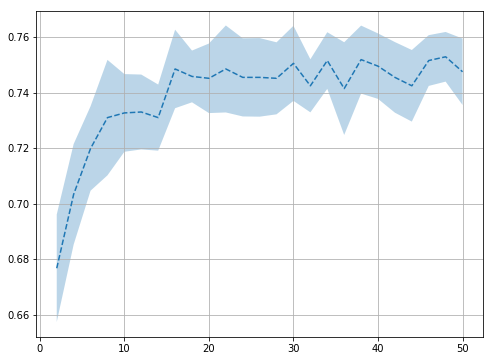

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
dependency_n_estimator(clf, np.arange(2, 51, 2))

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
from sklearn.model_selection import KFold